# Exercise Chapter 8_ex 
Industrial Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (2023) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/mistat-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf
import lifelines
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
import mistat
from statsmodels.tsa.api import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Exercise 1

In [3]:
pensim_100 = mistat.load_data('PENSIM_100')
predictors = ['Fg', 'RPM', 'Fs', 'Ts', 'S', 'DO', 'Uvis', 
              'CO2', 'Hi', 'Ti', 'Ho', 'Fw']
outcome_X = 'X'
outcome_P = 'P'

<Axes: >

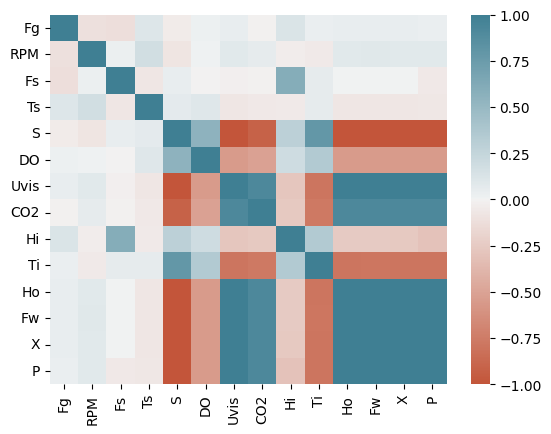

In [4]:
sns.heatmap(pensim_100.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True))

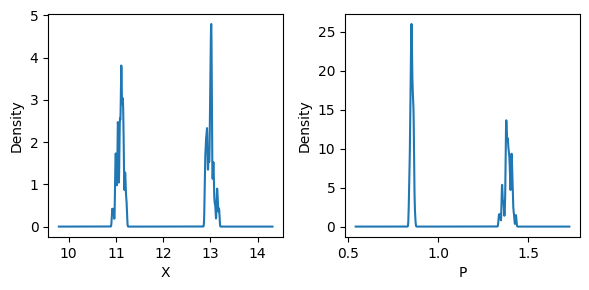

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=[6, 3])
pensim_100['X'].plot.density(bw_method=0.01, ax=axes[0])
axes[0].set_xlabel('X')
pensim_100['P'].plot.density(bw_method=0.01, ax=axes[1])
axes[1].set_xlabel('P')
plt.tight_layout()

In [6]:
X = pensim_100[predictors]
y = pensim_100[outcome_X]

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f'Linear regression : {np.mean(-scores):.5f}')

model = RandomForestRegressor()
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f'Random forest regression : {np.mean(-scores):.5f}')

Linear regression : 0.00107


Random forest regression : 0.01282


In [7]:
X = pensim_100[predictors]
y = pensim_100[outcome_P]

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f'Linear regression : {np.mean(-scores):.5f}')

model = RandomForestRegressor()
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f'Random forest regression : {np.mean(-scores):.5f}')

Linear regression : 0.00716


Random forest regression : 0.00940


# Exercise 2

In [8]:
data = mistat.load_data('PENSIM_CCD.csv')
predictors = ['S0', 'pH', 'time', 'feed']

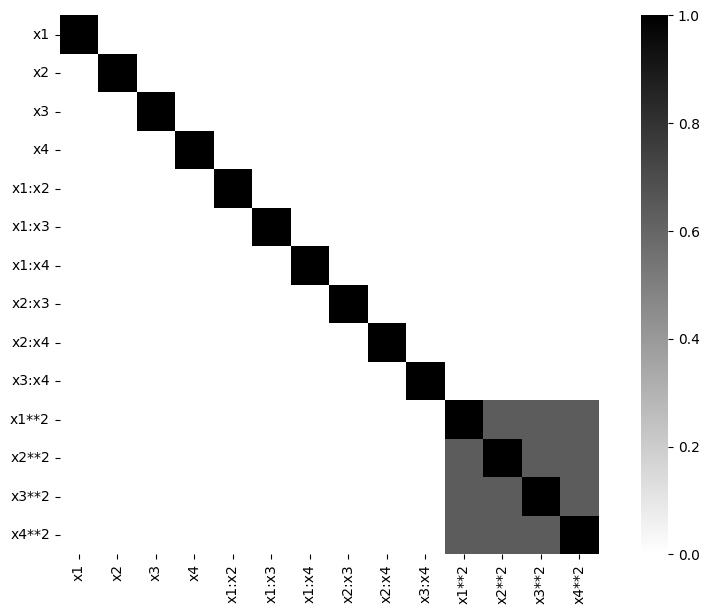

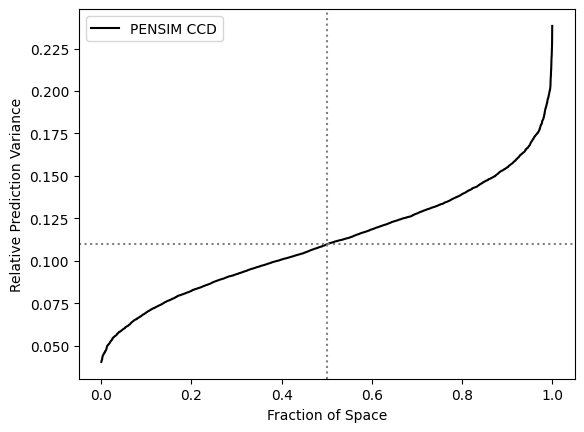

In [9]:
def plotCorrelation(design, mod=0, ax=None):
    mm = mistat.getModelMatrix(design, mod=mod)
    mm = mm.drop(columns='Intercept')
    corr = mm.corr().abs()
    if ax is None:
        fig, ax = plt.subplots()
        fig.set_size_inches(11, 7)
    sns.heatmap(corr, cmap='binary', ax=ax, square=True)
    return ax

plotCorrelation(data[predictors], mod=2)

_ = mistat.FDS_Plot(data[predictors], label='PENSIM CCD')

In [10]:
formula = ('X ~ (S0 + pH + time + feed)**2 + ' +
           'I(S0**2) + I(pH**2) + I(time**2) + I(feed**2)')
model = smf.ols(formula, data=data).fit()
print(model.summary2().tables[1].round(4))

                 Coef.  Std.Err.       t   P>|t|     [0.025     0.975]
Intercept      -7.0367    7.4674 -0.9423  0.3663   -23.4724     9.3989
S0              0.2829    0.1164  2.4299  0.0334     0.0267     0.5391
pH             -0.2835    3.4977 -0.0810  0.9369    -7.9818     7.4149
time            0.0496    0.0242  2.0450  0.0655    -0.0038     0.1029
feed          213.1175   79.3833  2.6847  0.0212    38.3959   387.8390
S0:pH          -0.0338    0.0153 -2.2018  0.0499    -0.0676    -0.0000
S0:time        -0.0004    0.0002 -2.3243  0.0403    -0.0007    -0.0000
S0:feed         0.6962    0.7674  0.9073  0.3837    -0.9928     2.3853
pH:time        -0.0057    0.0015 -3.6843  0.0036    -0.0090    -0.0023
pH:feed         6.9927    7.6741  0.9112  0.3817    -9.8978    23.8833
time:feed       0.2036    0.0767  2.6532  0.0225     0.0347     0.3725
I(S0 ** 2)     -0.0000    0.0038 -0.0042  0.9967    -0.0085     0.0084
I(pH ** 2)      0.2168    0.3836  0.5651  0.5833    -0.6276     1.0612
I(time

In [11]:
formula = ('P ~ (S0 + pH + time + feed)**2 + ' +
           'I(S0**2) + I(pH**2) + I(time**2) + I(feed**2)')
model = smf.ols(formula, data=data).fit()
print(model.summary2().tables[1].round(4))

                 Coef.  Std.Err.       t   P>|t|    [0.025    0.975]
Intercept      -7.7603    2.2162 -3.5015  0.0050  -12.6382   -2.8823
S0              0.0712    0.0345  2.0613  0.0637   -0.0048    0.1473
pH              3.1952    1.0381  3.0780  0.0105    0.9104    5.4800
time            0.0085    0.0072  1.1832  0.2617   -0.0073    0.0243
feed          -74.5196   23.5602 -3.1629  0.0090 -126.3752  -22.6640
S0:pH          -0.0065    0.0046 -1.4322  0.1799   -0.0165    0.0035
S0:time        -0.0001    0.0000 -2.3874  0.0360   -0.0002   -0.0000
S0:feed         0.1250    0.2278  0.5490  0.5940   -0.3763    0.6263
pH:time        -0.0018    0.0005 -3.9791  0.0022   -0.0028   -0.0008
pH:feed        15.3345    2.2776  6.7328  0.0000   10.3215   20.3474
time:feed       0.1155    0.0228  5.0726  0.0004    0.0654    0.1657
I(S0 ** 2)     -0.0001    0.0011 -0.0879  0.9315   -0.0026    0.0024
I(pH ** 2)     -0.3177    0.1139 -2.7905  0.0176   -0.5683   -0.0671
I(time ** 2)   -0.0000    0.0000 -

# Exercise 3

Index(['Order', 'Healthy', 'Log[Healthy]', 'PSD - 10 mm', 'Log[PSD - 10 mm]',
       'PSD - 20 mm', 'Log[PSD - 20 mm]'],
      dtype='object')


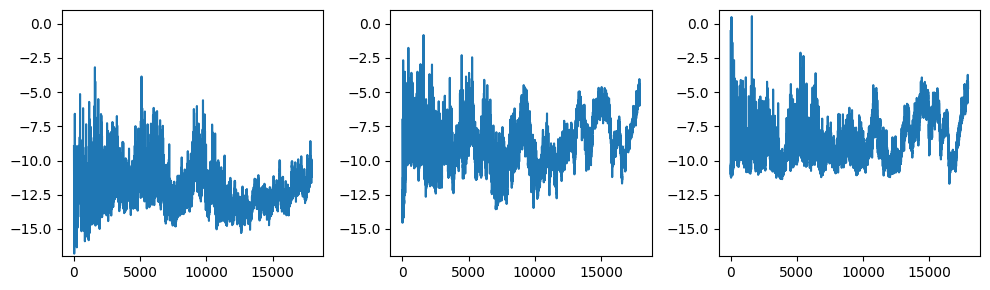

In [12]:
data = mistat.load_data('ORDER_PSD.csv')
print(data.columns)
fig, axes = plt.subplots(ncols=3, figsize=[10,3])
data['Log[Healthy]'].plot(ax=axes[0])
data['Log[PSD - 10 mm]'].plot(ax=axes[1])
data['Log[PSD - 20 mm]'].plot(ax=axes[2])
for ax in axes:
    ax.set_ylim(-17, 1)
plt.tight_layout()

In [13]:
parameters = {
    'Log[Healthy]': (2, 1, 1),
    'Log[PSD - 10 mm]': (2, 1, 2),
    'Log[PSD - 20 mm]': (2, 1, 2),
}

results = {}
for series, parameter in parameters.items():
    mod = SARIMAX(data[series], order=parameter)
    results[series] = mod.fit(method='nm', maxiter=600, disp=False)

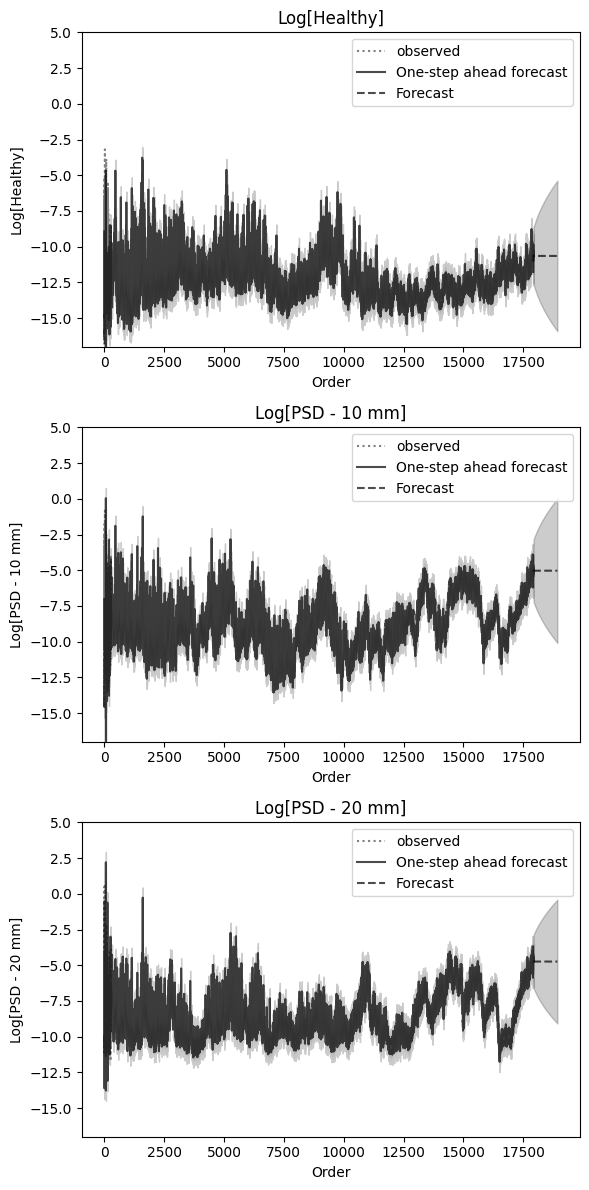

In [14]:
def addSARIMAX_predictions(predictions, ax, series, label=None, linestyle=None):
    pred_mean = predictions.predicted_mean
    pred_mean.index = pred_mean.index + 1
    pred_mean.plot(ax=ax, label=label, alpha=0.7, color='black', linestyle=linestyle)
    pred_ci = predictions.conf_int()
    pred_ci.index = pred_ci.index + 1
    ax.fill_between(pred_ci.index[1:],
                    pred_ci[f'lower {series}'].iloc[1:], pred_ci[f'upper {series}'].iloc[1:], 
                    color='k', alpha=0.2)

fig, axes = plt.subplots(nrows=3, figsize=[6, 12])
for ax, (series, result) in zip(axes, results.items()):
    data[['Order', series]].plot(x='Order', y=series, label='observed', ax=ax,
                                 color='grey', linestyle=':')
    predictions = result.get_prediction(start=1)
    addSARIMAX_predictions(predictions, ax, series, label='One-step ahead forecast')
    forecast = result.get_prediction(start=len(data), end=len(data) + 1000, dynamic=True, full_results=True)
    addSARIMAX_predictions(forecast, ax, series, label='Forecast', linestyle='--')
    ax.set_title(series)
    ax.set_xlabel('Order')
    ax.set_ylabel(series)
    ax.set_ylim(-17, 5)
    ax.legend()    

plt.tight_layout()
plt.show()

In [15]:
pd.DataFrame({k: model.params for k, model in results.items()})

,Log[Healthy],Log[PSD - 10 mm],Log[PSD - 20 mm]
ar.L1,1.331605,1.057846,0.970183
ar.L2,-0.532976,-0.213922,-0.166351
ma.L1,-0.959408,-0.628138,-0.636777
ma.L2,NaN,-0.340708,-0.329220
sigma2,0.153597,0.136405,0.133744


# Exercise 4

In [16]:
data = mistat.load_data('TEMP_WORLD.csv')
cities = ['CapeTown', 'BuenosAries', 'Paris', 'Madrid', 
       'Tokyo', 'Brisbane', 'Auckland', 'LosAngeles']
data['Year'] = [int(s.split('M')[0]) for s in data['Date']]
data['Month'] = [int(s.split('M')[1]) for s in data['Date']]

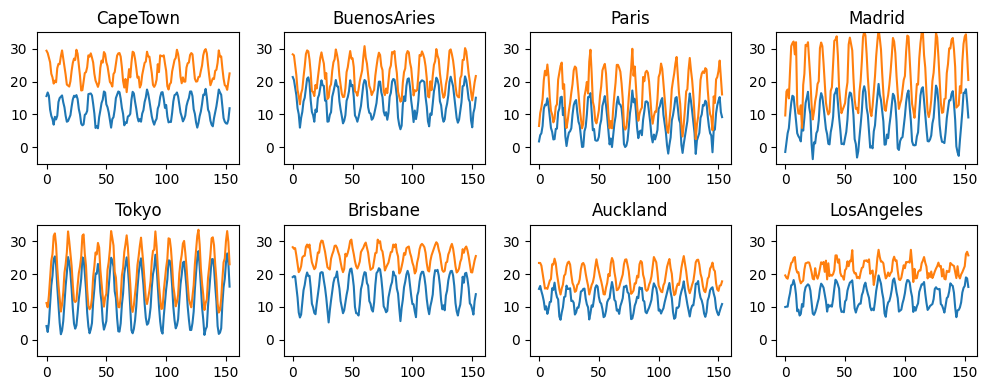

In [17]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=[10, 4])
for city, ax in zip(cities, [*axes[0], *axes[1]]):
    data[[f'{city}Min', f'{city}Max']].plot(ax=ax, legend=False)
    ax.set_ylim(-5, 35)
    ax.set_title(city)
plt.tight_layout()

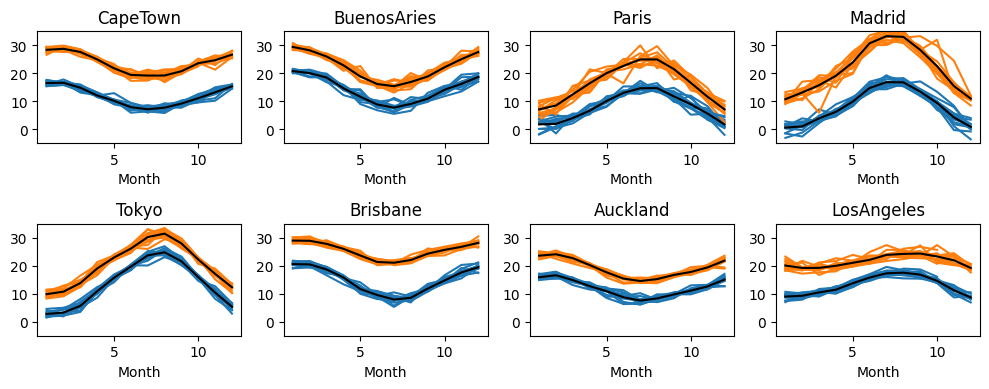

In [18]:
meanTemp = data.groupby('Month').mean(numeric_only=True)

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=[10, 4])
for city, ax in zip(cities, [*axes[0], *axes[1]]):
    for key, group in data.groupby('Year'):
        group.plot(x='Month', y=f'{city}Min', ax=ax, c='C0', legend=False)
        group.plot(x='Month', y=f'{city}Max', ax=ax, c='C1', legend=False)
    meanTemp[[f'{city}Min', f'{city}Max']].plot(ax=ax, legend=False, color='black')
    ax.set_ylim(-5, 35)
    ax.set_title(city)
plt.tight_layout()

In [19]:
# determine average monthly temperatures
meanTemp = data.groupby('Month').mean(numeric_only=True)

In [20]:
months = [*meanTemp.index, *meanTemp.index]
labels = [*(['Min']*12), *(['Max']*12)]
reformatted = []
for city in cities:
    reformatted.append([*meanTemp[f'{city}Min'], *meanTemp[f'{city}Max']])
combined = pd.DataFrame(reformatted, index=cities, columns=[labels, months])

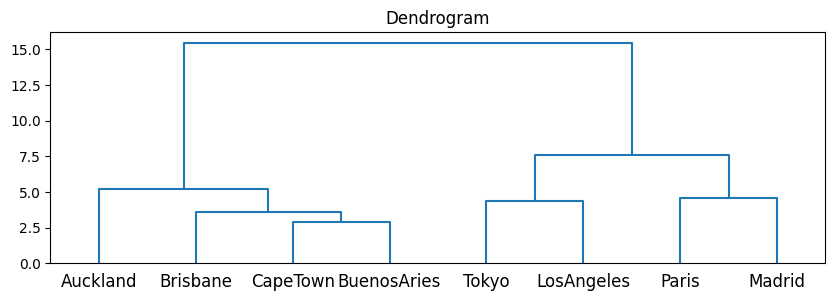

In [21]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from mistat import plot_dendrogram

scaler = StandardScaler()
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
X = scaler.fit_transform(combined)
model = model.fit(X)

fig, ax = plt.subplots(figsize=[10, 3])
plot_dendrogram(model, ax=ax, labels=combined.index)
ax.set_title('Dendrogram')
plt.show()

In [22]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=1).fit(X)
print('Cluster membership (first two data points)')
pd.DataFrame({
  'City': cities,
  'Cluster': model.predict(X),
})

Cluster membership (first two data points)


,City,Cluster
0,CapeTown,0
1,BuenosAries,0
2,Paris,1
3,Madrid,1
4,Tokyo,1
5,Brisbane,0
6,Auckland,0
7,LosAngeles,1


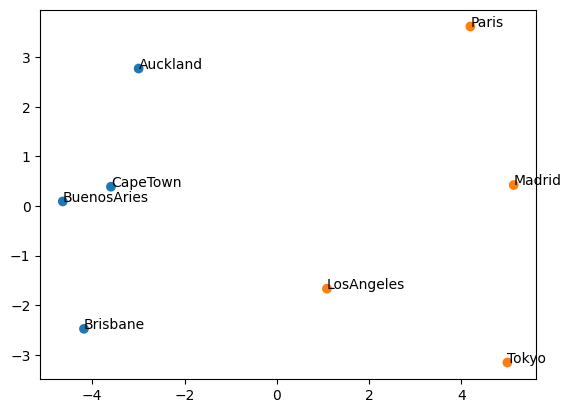

In [23]:
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull

# use PCA to map the dataset into a 2D space
pca = PCA(n_components=2).fit(X)
coord = pca.transform(X)

fig, ax = plt.subplots()
df = pd.DataFrame({'x': coord[:,0], 'y': coord[:,1],
                   'cluster': model.predict(X),
                   'city': combined.index})

colors = [f'C{i}' for i in model.predict(X)]
ax.scatter(df.x, df.y, color=[f'C{cl}' for cl in df.cluster])
for _, row in df.iterrows():
    ax.annotate(row.city, (row.x, row.y))

plt.show()